# Heart Disease Dataset

This is a brief look at the heart disease dataset found at https://www.kaggle.com/ronitf/heart-disease-uci/home provided by Kaggle user ronit. We will attempt to create a model for predicting whether patients have heart disease or not.

Acknowledgement to original creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline

Using TensorFlow backend.


In [2]:
heartData = pd.read_csv('heart-disease-uci/heart.csv')

## Exploratory Data Analysis

In [3]:
#A quick snapshot of the data
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


-  age: age in years
-  sex: 1 = male; 0 = female
-  cp: chest pain type (0, 1, 2 or 3)
-  trestbps: resting blood pressure (in mm Hg on admission to the hospital)
-  chol: serum cholestoral in mg/dl
-  fbs: fasting blood sugar > 120 mg/d (1 = true; 0 = false)
-  restecg: resting electrocardiographic results
-  thalach: maximum heart rate achieved
-  exang: exercise induced angina (1 = yes; 0 = no)
-  oldpeak: ST depression induced by exercise relative to rest
-  slope: the slope of the peak exercise ST segment
-  ca: number of major vessels (0-3) colored by flourosopy
-  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
-  target: whether the patient has heart disease or not (1=true; 0=false)

In [4]:
#Check for missing values
heartData.isnull().values.any()

False

There are no missing values in the dataset which makes things easier.

In [5]:
heartData.target.value_counts()

1    165
0    138
Name: target, dtype: int64

We see that in the dataset there are 165 patients with heart disease and 138 without. We now explore some of the rest of the data.

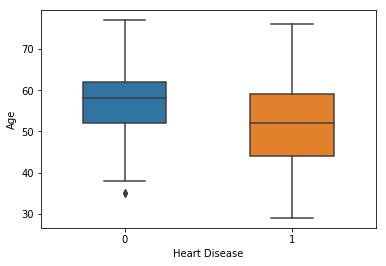

In [6]:
#Illustrating the age breakdown for people with or without heart disease
sns.boxplot(y='age', x='target', data=heartData, width=0.5)
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

We see here that the patients with heart disease have a slightly greater spread of ages and a slightly lower median age, this is likely just reflective of the dataset rather than an indication that people with heart disease tend to be younger, however.

In [7]:
heartData.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

The dataset contains a much larger portion of males compared to females.

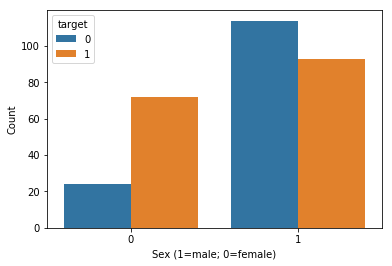

In [8]:
#Showing the number of patients with and without heart disease for males and females
sns.countplot(x='sex',hue='target',data=heartData)
plt.xlabel('Sex (1=male; 0=female)')
plt.ylabel('Count')
plt.show()

We see that in the dataset the slight majority of the men don't have heart disease. In contrast, the majority of women in the dataset do have heart disease.

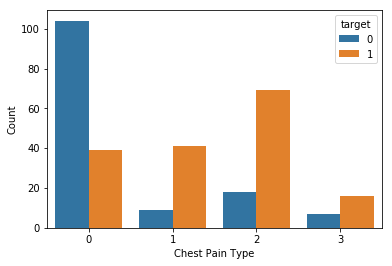

In [9]:
#Showing the number of patients with and without heart disease
#for each chest pain type
sns.countplot(x='cp', hue='target',data=heartData)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

The graph suggests that having types one, two or three chest pain indicates it is more likely the patient has heart disease while for type zero it doesn't.

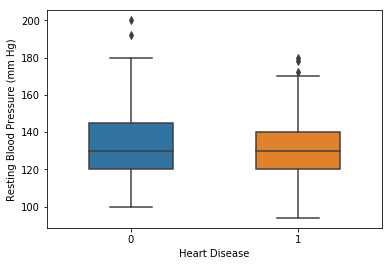

In [10]:
#Illustrating the resting blood pressure breakdown for people with
#or without heart disease
sns.boxplot(y='trestbps', x='target', data=heartData, width=0.5)
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

This plot doesn't seem to indicate a whole lot, the two box plots are fairly similar. One might expect that the patients with heart disease would have higher blood pressure but this doesn't seem to be the case, with both having similar medians and the the heart disease patients having a lower maximum and minimum.

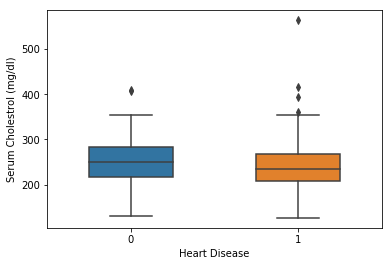

In [11]:
#Illustrating the cholestrol breakdown for people with or without heart disease
sns.boxplot(y='chol', x='target', data=heartData, width=0.5)
plt.xlabel('Heart Disease')
plt.ylabel('Serum Cholestrol (mg/dl)')
plt.show()

Both box plots are pretty similar with the heart disease patients actually having a lower median serum cholestrol. However, the heart disease patients did have more high outliers.

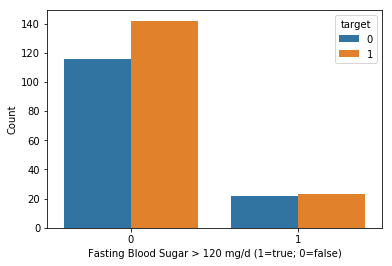

In [12]:
#Showing the number of patients with fasting blood sugar > 120 mg/d with
#and without heart disease
sns.countplot(x='fbs', hue='target', data=heartData)
plt.xlabel('Fasting Blood Sugar > 120 mg/d (1=true; 0=false)')
plt.ylabel('Count')
plt.show()

NOTE: The rest of the graphs and analysis have been omitted for brevity.

## Classification

From our earlier exploration we found that in the dataset there were 165 patients with heart disease and 138 without. This is fairly balanced so we will just use the percentage of correct predictions (accuracy) as our evaluation metric.

In [13]:
#Using scikit learn, split data into randomly selected training and test data sets, 
#picking a particular random seed for reproducibility
X = heartData.drop('target',axis=1)
y = heartData.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=29)

### Logistic Regression

In [14]:
logregModel = LogisticRegression(C=1, random_state=7)
logregModel.fit(X_train, y_train)
logregModel.score(X_test, y_test)

0.8852459016393442

This model had an approximate 89% accuracy on the test data.

In [15]:
#Show the coefficients of the model
coefficients = [np.append(logregModel.coef_,[logregModel.intercept_])]
cols = np.append(heartData.columns[:-1].values, 'intercept')
coefDF = pd.DataFrame(coefficients,columns=cols)
print(coefDF)

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.003849 -1.389893  0.609384 -0.010705 -0.004728 -0.092204  0.217785   

    thalach     exang   oldpeak     slope        ca      thal  intercept  
0  0.028552 -0.875887 -0.510099  0.559318 -0.708902 -0.494848   0.198364  


To calculate the estimated probability for a given patient to have heart disease you multiply the value of each variable by the corresponding model coefficient and then add the intercept. Then you apply the logistic function $f(x)=\frac{1}{1+e^{-x}}$. Therefore, in the model, there is a positive correlation between age and heart disease. Additionally, the model has, all else being equal, a female is more likely to have heart disease. Similar conclusions can be drawn from the other coefficients, where a coefficient being positive means there's a positive correlation and for negative, a negative correlation (others coefficient explanations removed for brevity). We should check for overfitting, however.

In [16]:
#Cross validation
scores = cross_val_score(logregModel, X, y, cv=10)
print(scores)
print(scores.mean())

[0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
0.8237449017426769


We have split the test and training data ten different ways and performed cross validation. The lowest score was 0.69 and the highest 0.9, which is quite a spread. The mean was 0.82 which is much lower than the accuracy from the initial set of 0.89. This suggests that our model is overfitting the data. We will try introducing stronger L2 regularisation. Another method could be to perform variable selection on the predictive variables on the dataset (which we won't do here).

In [17]:
#stronger regularisation
lrModel2 = LogisticRegression(C=0.5, random_state=7)
scores = cross_val_score(lrModel2, X, y, cv=10)
print(scores.mean())

0.8303040415276233


The stronger regularisation seems to have reduced overfitting slightly, this could be optimised using grid search. This is a simple model without interaction between terms (an additive model), we could use a logistic model with interaction but we will instead use an artificial neural network which is capable of a more complex model to see if we can improve our model.

### Neural Network

In [18]:
#train neural net
np.random.seed(1)
nnmodel = Sequential()
nnmodel.add(Dense(13,input_dim=13,activation='relu'))
nnmodel.add(Dense(13,activation='relu'))
nnmodel.add(Dense(1, activation='sigmoid'))
nnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nnmodel.fit(X_train,y_train, epochs=500,batch_size=10,verbose=0)

In [19]:
#check accuracy
pred = np.array([i[0] for i in nnmodel.predict(X_test)]) >= 0.5
actual = y_test.values
print(sum(pred == actual)/len(y_test))

0.819672131147541


We use the commonly used ReLU (Rectified Linear Unit) activation function for the hidden layers and the sigmoid function for the output layer as we are outputing probabilities. The accuracy was worse than that of the logistic regression classifiers. A neural network model is capable of emulating a logistic regression model so can probably get a score at least as good as that model by optimising the model efficiently.

## Conclusion

Our best model was the logistic regression model. There are many other models that could have been tried such as support vector machines, however, we have decided not to pursue those in this project. Additionally, we have left out many parts to save time and to reduce the length of the project such as cross validation for the neural network.